# Challenge 2

In this challenge we will continue working with `Pokemon.csv`. We will attempt solving a slightly more complex problem in which we will practice the iterative data analysis process you leaned in [this video](https://www.youtube.com/watch?v=xOomNicqbkk).

The problem statement is as follows:

**You are at a Pokemon black market planning to buy a Pokemon for battle. All Pokemons are sold at the same price and you can only afford to buy one. You cannot choose which specific Pokemon to buy. However, you can specify the type of the Pokemon - one type that exists in either `Type 1` or `Type 2`. Which type should you choose in order to maximize your chance of receiving a good Pokemon?**

To remind you about the 3 steps of iterative data analysis, they are:

1. Setting Expectations
1. Collecting Information
1. Reacting to Data / Revising Expectations

Following the iterative process, we'll guide you in completing the challenge.

## Provlem Solving Iteration 1

In this iteration we'll analyze the problem and identify the breakthrough. The original question statement is kind of vague because we don't know what a *good pokemon* really means as represented in the data. We'll start by understanding the dataset and see if we can find some insights.

In [16]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# importing the dataset and inspect the first few rows of the data
pokemon = pd.read_csv('Pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


From the data it seems whether a pokemon is good depends on its abilities as represented in the fields of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total`. We are not sure about `Generation` and `Legendary` because they are not necessarily the decisive factors of the pokemon abilities.

But `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`, and `Total` are a lot of fields! If we look at them all at once it's very complicated. This isn't Mission Impossible but it's ideal that we tackle this kind of problem after we learn Machine Learning (which you will do in Module 3). For now, is there a way to consolidate the fields we need to look into?

Fortunately there seems to be a way. It appears the `Total` field is computed based on the other 6 fields. But we need to prove our theory. If we can approve there is a formula to compute `Total` based on the other 6 abilities, we only need to look into `Total`.

We have the following expectation now:

#### The `Total` field is computed based on `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, and `Speed`.

We need to collect the following information:

* **What is the formula to compute `Total`?**
* **Does the formula work for all pokemons?**

In the cell below, make a hypothesis on how `Total` is computed and test your hypothesis.

In [3]:
# your code here

pokemon['TotalCalculated'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense'] + pokemon['Sp. Atk']+ pokemon['Sp. Def'] + pokemon['Speed']

In [4]:
(pokemon['TotalCalculated'] == pokemon['Total']).unique()
#Todos são verdadeiros. Fórmula é a soma de todos

array([ True])

## Provlem Solving Iteration 2

Now that we have consolidated the abilities fields, we can update the problem statement. The new problem statement is:

### Which pokemon type is most likely to have the highest `Total` value?

In the updated problem statement, we assume there is a certain relationship between the `Total` and the pokemon type. But we have two *type* fields (`Type 1` and `Type 2`) that have string values. In data analysis, string fields have to be transformed to numerical format in order to be analyzed. 

In addition, keep in mind that `Type 1` always has a value but `Type 2` is sometimes empty (having the `NaN` value). Also, the pokemon type we choose may be either in `Type 1` or `Type 2`.

Now our expectation is:

#### `Type 1` and `Type 2` string variables need to be converted to numerical variables in order to identify the relationship between `Total` and the pokemon type.

The information we need to collect is:

#### How to convert two string variables to numerical?

Let's address the first question first. You can use a method called **One Hot Encoding** which is frequently used in machine learning to encode categorical string variables to numerical. The idea is to gather all the possible string values in a categorical field and create a numerical field for each unique string value. Each of those numerical fields uses `1` and `0` to indicate whether the data record has the corresponding categorical value. A detailed explanation of One Hot Encoding can be found in [this article](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f). You will formally learn it in Module 3.

For instance, if a pokemon has `Type 1` as `Poison` and `Type 2` as `Fire`, then its `Poison` and `Fire` fields are `1` whereas all other fields are `0`. If a pokemon has `Type 1` as `Water` and `Type 2` as `NaN`, then its `Water` field is `1` whereas all other fields are `0`.

#### In the next cell, use One Hot Encoding to encode `Type 1` and `Type 2`. Use the pokemon type values as the names of the numerical fields you create.

The new numerical variables you create should look like below:

![One Hot Encoding](one-hot-encoding.png)

In [18]:
# your code here
#Solução anterior comentada

#t1 = pd.get_dummies(pokemon['Type 1'], prefix = "Type1")
#t2 = pd.get_dummies(pokemon['Type 2'], prefix = "Type2")

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

pokemon.loc[(pokemon['Type 1'].notnull()) & (pokemon['Type 2'].notnull()), 'Combo Type'] = pokemon['Type 1'] + '-' + pokemon['Type 2']
pokemon.loc[(pokemon['Type 1'].isnull()) & (pokemon['Type 2'].notnull()), 'Combo Type'] = pokemon['Type 2']
pokemon.loc[(pokemon['Type 2'].isnull()) & (pokemon['Type 1'].notnull()), 'Combo Type'] = pokemon['Type 1']
pokemon.head()



,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combo Type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass-Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass-Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass-Poison
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Grass-Poison
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Fire


In [19]:
pokemon_type_dummies = pokemon['Combo Type'].str.get_dummies(sep='-')
pokemon_type_dummies.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Provlem Solving Iteration 3

Now we have encoded the pokemon types, we will identify the relationship between `Total` and the encoded fields. Our expectation is:

#### There are relationships between `Total` and the encoded pokemon type variables and we need to identify the correlations.

The information we need to collect is:

#### How to identify the relationship between `Total` and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of `Total` to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest `Total`.

In [20]:
# your code here

#Solução anterior comentada
#cols1 = [i for i in t1.columns]

#print(cols1)

#cols2 = [i for i in t2.columns]

#print(cols2)

pokemon_type_dummies['Total'] = pokemon['Total']
pokemon_type_dummies.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,Total
0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,318
1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,405
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,525
3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,625
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,309


In [99]:
#Solução anterior comentada

#ls = [i for i in pokemon['Total'].values]    
#ls2 = []

#coef_t1 = []
#for i in cols1:
#    ls2 = [i for i in t1[i].values]
#    coef_t1.append([i, np.corrcoef(ls, ls2)[0][1]])



#coef_t2 = []
#for i in cols2:
#    ls2 = [i for i in t2[i].values]
#    coef_t2.append([i , np.corrcoef(ls, ls2)[0][1]])


#df1 = pd.DataFrame(coef_t1, columns=['Type1','Coef1']).sort_values('Coef1', ascending=False)
#df2 = pd.DataFrame(coef_t2,columns=['Type2','Coef2']).sort_values('Coef2', ascending=False)

#df1.head()


,Type1,Coef1
2,Type1_Dragon,0.196532
14,Type1_Psychic,0.094364
16,Type1_Steel,0.082000
6,Type1_Fire,0.050527
15,Type1_Rock,0.037524


In [21]:
pokemon_type_dummies.corr()['Total'].sort_values(ascending=False)

Total       1.000000
Dragon      0.229705
Psychic     0.124688
Steel       0.109703
Fire        0.078726
Fighting    0.077786
Ice         0.060248
Flying      0.059383
Dark        0.056154
Rock        0.032731
Electric    0.020971
Ground      0.015060
Ghost       0.003641
Water      -0.021665
Fairy      -0.036698
Grass      -0.052592
Poison     -0.090441
Normal     -0.105331
Bug        -0.145781
Name: Total, dtype: float64

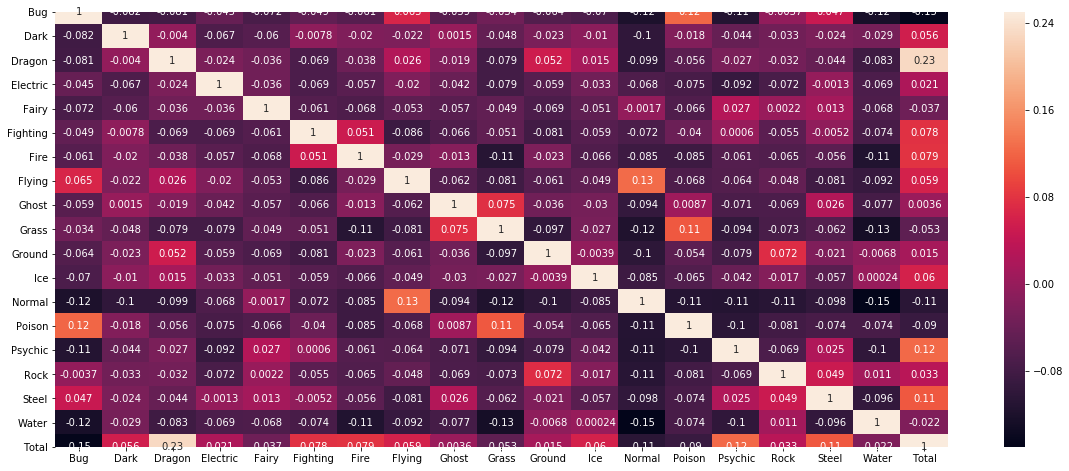

In [39]:
# plot the correlations
plt.figure(figsize=(20,8))
sns.heatmap(pokemon_type_dummies.corr(), annot=True, vmin=-0.15, vmax=0.25)



#Visualização cortada é issue do matplotlib na última versão. Não quis reverter para o pacote anterior. 

# Bonus Question

Say now you can choose both `Type 1` and `Type 2` of the pokemon. In order to receive the best pokemon, which types will you choose?

In [67]:
pokemon_type_dummies[pokemon_type_dummies['Dragon']==1].corr()["Total"].sort_values(ascending=False)[1:]

Ice         0.258348
Psychic     0.225239
Ghost       0.199128
Fire        0.165998
Electric    0.148712
Steel       0.139361
Flying      0.113923
Water       0.098297
Grass       0.088955
Fairy       0.048631
Poison     -0.048147
Ground     -0.131102
Rock       -0.144420
Dark       -0.181424
Bug              NaN
Dragon           NaN
Fighting         NaN
Normal           NaN
Name: Total, dtype: float64

In [68]:
pokemon[(pokemon['Type 1']=='Dragon') & (pokemon['Type 2']=='Ice') ]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combo Type
710,646,Kyurem,Dragon,Ice,660,125,130,90,130,90,95,5,True,Dragon-Ice
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True,Dragon-Ice
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True,Dragon-Ice


In [69]:
pokemon[(pokemon['Type 1']=='Ice') & (pokemon['Type 2']=='Dragon')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combo Type


In [71]:
pokemon_type_dummies[pokemon_type_dummies['Bug']==1].corr()["Total"].sort_values()[1:]

Poison     -0.134020
Water      -0.113525
Ground     -0.050511
Grass       0.011670
Electric    0.023366
Fire        0.110409
Rock        0.121694
Flying      0.169964
Fighting    0.249384
Steel       0.369750
Total       1.000000
Bug              NaN
Dark             NaN
Dragon           NaN
Fairy            NaN
Ice              NaN
Normal           NaN
Psychic          NaN
Name: Total, dtype: float64

In [120]:
pokemon[(pokemon['Type 1']=='Bug') & (pokemon['Type 2']=='Poison')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,TotalCalculated
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False,195
17,14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False,205
18,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False,395
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False,495
53,48,Venonat,Bug,Poison,305,60,55,50,40,55,45,1,False,305
54,49,Venomoth,Bug,Poison,450,70,65,60,90,75,90,1,False,450
181,167,Spinarak,Bug,Poison,250,40,60,40,40,40,30,2,False,250
182,168,Ariados,Bug,Poison,390,70,90,70,60,60,40,2,False,390
292,269,Dustox,Bug,Poison,385,60,50,70,50,90,65,3,False,385
603,543,Venipede,Bug,Poison,260,30,45,59,30,39,57,5,False,260


In [72]:
pokemon[(pokemon['Type 1']=='Poison') & (pokemon['Type 2']=='Bug')]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Combo Type
501,451,Skorupi,Poison,Bug,330,40,50,90,30,55,65,4,False,Poison-Bug
